In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import lognorm
from pathlib import Path
import sys
import os

sys.path.append('../../../analyzing_serverless_in_the_wild')

import process_data
import source.utilities as utilities 
import source.policy as policy
import source.plotting as plotting

In [2]:
dir_path = "../../chunk_invocation_data"
results_path = "../../simulation_results"
plot_path = "plots"

Path(plot_path).mkdir(parents=True, exist_ok=True)

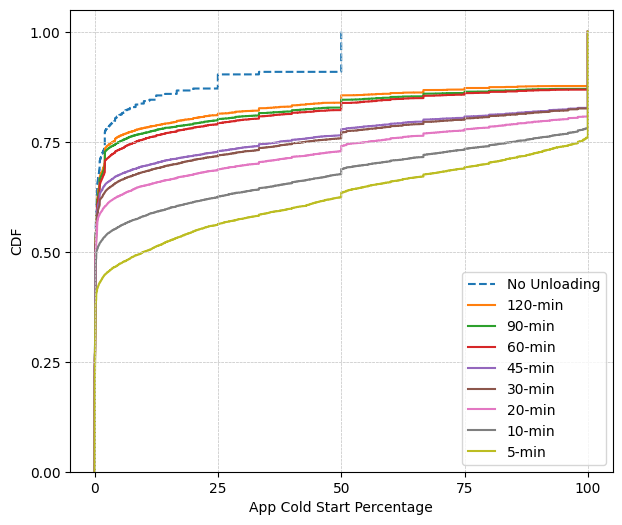

In [3]:
## FIXED CDF

fixed_list = []
color_dict = {
    5: 'tab:olive',
    10: 'tab:grey',
    20: 'tab:pink',
    30: 'tab:brown',
    45: 'tab:purple',
    60: 'tab:red',
    90: 'tab:green',
    120: 'tab:orange',
    20_000: 'tab:blue'
}
for keep_alive in reversed(list(color_dict.keys())):
    file_name = f'Fixed_{keep_alive}.csv'
    file_path = os.path.join(results_path, file_name)
    sim_result = pd.read_csv(file_path)
    sim_result = sim_result[['ColdStartPercentage', 'WastedMemoryRatio']]

    plot_dict = {}
    plot_dict['DF'] = sim_result
    plot_dict['Label'] = f"{keep_alive}-min"
    plot_dict['Linestyle'] = '-'
    plot_dict['Color'] = color_dict[keep_alive]
    if keep_alive == 20_000:
        plot_dict['Label'] = 'No Unloading'
        plot_dict['Linestyle'] = '--'

    fixed_list.append(plot_dict)

plotting.plot_cdf_coldstarts(fixed_list, save_file=True, file_name=f'{plot_path}/fixed_cdf.pdf')

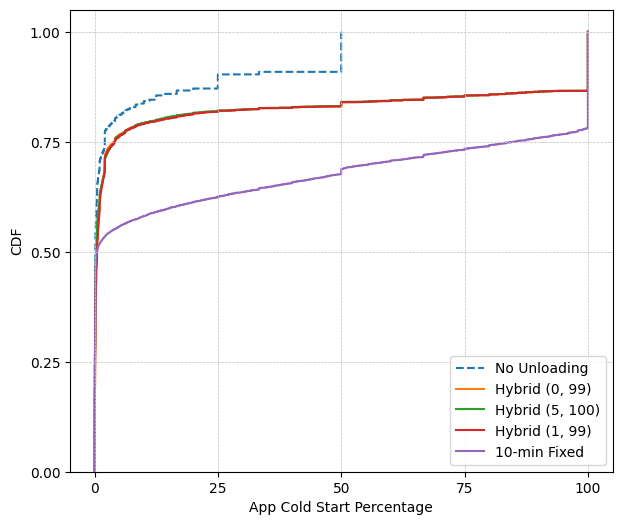

In [4]:
## PLOT HYBRID CDF 1
filename = 'Fixed_20000.csv'
file_path = os.path.join(results_path, filename)
no_unloading = pd.read_csv(file_path)
graphs = [{'DF': no_unloading, 'Label': 'No Unloading', 'Linestyle': '--', 'Color': 'tab:blue'}]

graphs.extend([{'Percentile': (0,99), 'Color': 'tab:orange', 'Linestyle': '-'},
          {'Percentile': (5,100), 'Color': 'tab:green', 'Linestyle': '-'},
          {'Percentile': (1,99), 'Color': 'tab:red', 'Linestyle': '-'},])

for idx, graph in enumerate(graphs[1:]):
    percentile = graphs[idx+1]['Percentile']
    file_name = f'Hybrid_{percentile}.csv'
    file_path = os.path.join(results_path, file_name)

    sim_result = pd.read_csv(file_path)
    sim_result = sim_result[['ColdStartPercentage', 'WastedMemoryRatio']]

    graphs[idx+1]['DF'] = sim_result
    graphs[idx+1]['Label'] = f"Hybrid {percentile}"

fixed_10 = pd.read_csv(f"{results_path}/Fixed_10.csv")
graphs.append({'DF': fixed_10, 'Label': '10-min Fixed', 'Linestyle': '-', 'Color': 'tab:purple'})

plotting.plot_cdf_coldstarts(graphs, save_file=True, file_name=f'{plot_path}/hybrid_cdf_1.pdf')

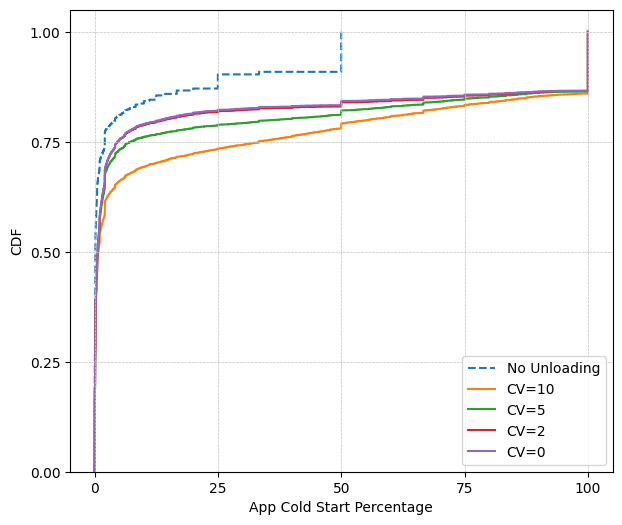

In [5]:
## CV CDF

color_dict = {
    10: 'tab:orange',
    5: 'tab:green',
    2: 'tab:red',
    0: 'tab:purple',
}

result_list = []

file_name = 'Fixed_20000.csv'
file_path = os.path.join(results_path, file_name)
no_unloading = pd.read_csv(file_path)
result_list.append({'DF': no_unloading[['ColdStartPercentage','WastedMemoryRatio']], 'Label': 'No Unloading', 'Linestyle': '--', 'Color': 'tab:blue'})

for cv in color_dict.keys():
    filename = f'Hybrid_CV_{cv}.csv'
    file_path = os.path.join(results_path, filename)
    sim_result = pd.read_csv(file_path)
    sim_result = sim_result[['ColdStartPercentage', 'WastedMemoryRatio']]

    plot_dict = {}
    plot_dict['DF'] = sim_result
    plot_dict['Label'] = f"CV={cv}"
    plot_dict['Linestyle'] = '-'
    plot_dict['Color'] = color_dict[cv]

    result_list.append(plot_dict)

plotting.plot_cdf_coldstarts(result_list, save_file=True, file_name=f'{plot_path}/cv_cdf.pdf')

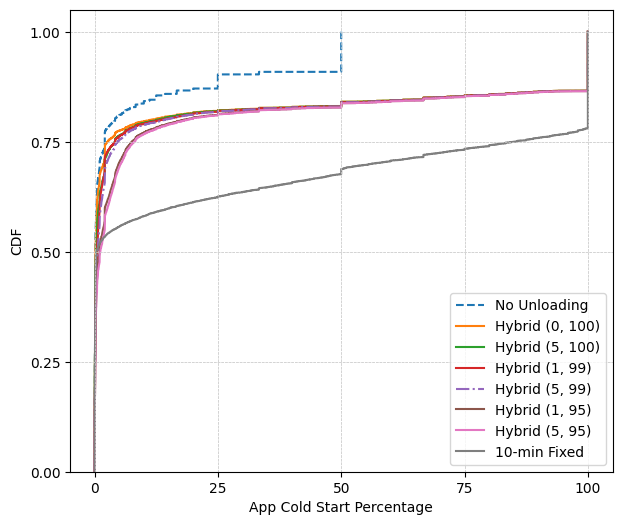

In [6]:
## PLOT HYBRID CDF 1

no_unloading = pd.read_csv(f'{results_path}/Fixed_20000.csv')
graphs = [{'DF': no_unloading, 'Label': 'No Unloading', 'Linestyle': '--', 'Color': 'tab:blue'}]

graphs.extend([{'Percentile': (0,100), 'Color': 'tab:orange', 'Linestyle': '-'},
          {'Percentile': (5,100), 'Color': 'tab:green', 'Linestyle': '-'},
          {'Percentile': (1,99), 'Color': 'tab:red', 'Linestyle': '-'},
          {'Percentile': (5,99), 'Color': 'tab:purple', 'Linestyle': '-.'},
          {'Percentile': (1,95), 'Color': 'tab:brown', 'Linestyle': '-'},
          {'Percentile': (5,95), 'Color': 'tab:pink', 'Linestyle': '-'},])

for idx, graph in enumerate(graphs[1:]):
    percentile = graphs[idx+1]['Percentile']
    file_name = f'Hybrid_{percentile}.csv'
    file_path = os.path.join(results_path, file_name)
    sim_result = pd.read_csv(file_path)

    sim_result = sim_result[['ColdStartPercentage', 'WastedMemoryRatio']]

    graphs[idx+1]['DF'] = sim_result
    graphs[idx+1]['Label'] = f"Hybrid {percentile}"

fixed_10 = pd.read_csv(f"{results_path}/Fixed_10.csv")
graphs.append({'DF': fixed_10, 'Label': '10-min Fixed', 'Linestyle': '-', 'Color': 'tab:gray'})

plotting.plot_cdf_coldstarts(graphs, save_file=True, file_name=f'{plot_path}/hybrid_cdf_1.pdf')

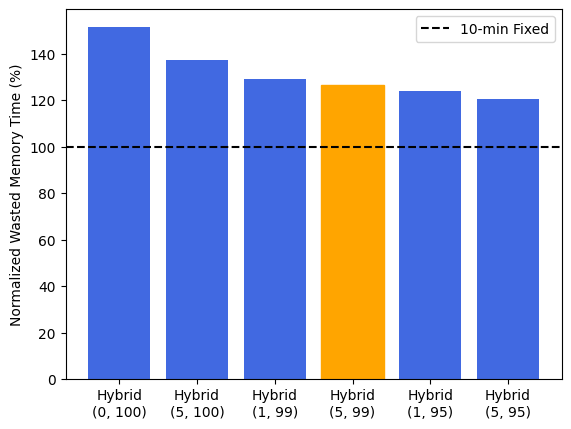

In [7]:
# no_unloading = pd.read_csv('Fixed_20000.csv')
# graphs = [{'DF': no_unloading, 'Label': 'No Unloading', 'Linestyle': '--', 'Color': 'tab:blue'}]

graphs = [{'Percentile': (0,100), 'Color': 'tab:orange', 'Linestyle': '-'},
          {'Percentile': (5,100), 'Color': 'tab:green', 'Linestyle': '-'},
          {'Percentile': (1,99), 'Color': 'tab:red', 'Linestyle': '-'},
          {'Percentile': (5,99), 'Color': 'tab:purple', 'Linestyle': '-.'},
          {'Percentile': (1,95), 'Color': 'tab:brown', 'Linestyle': '-'},
          {'Percentile': (5,95), 'Color': 'tab:pink', 'Linestyle': '-'},]

for idx, graph in enumerate(graphs):
    percentile = graphs[idx]['Percentile']
    file_name = f'Hybrid_{percentile}.csv'
    file_path = os.path.join(results_path, file_name)
    sim_result = pd.read_csv(file_path)
    sim_result = sim_result[['ColdStartPercentage', 'WastedMemoryRatio']]

    graphs[idx]['DF'] = sim_result
    graphs[idx]['Label'] = f"Hybrid {percentile}"

fixed_10 = pd.read_csv(f"{results_path}/Fixed_10.csv")
# graphs.append({'DF': fixed_10, 'Label': '10-min Fixed', 'Linestyle': '-', 'Color': 'tab:gray'})

# Your data
labels = [(0,100), (5,100), (1,99), (5,99), (1,95), (5,95)]

# Calculate the mean 'WastedMemoryRatio' for fixed_10
fixed_value = fixed_10['WastedMemoryRatio'].mean()

# Ensure fixed_value is not zero to avoid division by zero
if fixed_value == 0:
    raise ValueError("fixed_value is zero, cannot normalize data.")

# Extract and normalize data points
data_points = [
    (result_df['DF']['WastedMemoryRatio'].mean() / fixed_value) * 100
    for result_df in graphs
]

# Since fixed_value represents 100% after normalization
fixed_value_normalized = 100

# Set up the plot
fig, ax = plt.subplots()

# Plot each bar
bars = ax.bar(range(len(labels)), data_points, color='royalblue')

# Highlight the specific bar (fourth bar in this case)
highlight_index = 3
bars[highlight_index].set_color('orange')
bars[highlight_index].set_hatch('//')

# Add the horizontal line for 10-min Fixed at 100%
ax.axhline(y=fixed_value_normalized, color='black', linestyle='--', label="10-min Fixed")

# Labels and formatting
ax.set_xticks(range(len(labels)))
ax.set_xticklabels([f"Hybrid\n{label}" for label in labels])
ax.set_ylabel("Normalized Wasted Memory Time (%)")
ax.legend()

plt.savefig(f"{plot_path}/barplot_small.pdf")

plt.show()

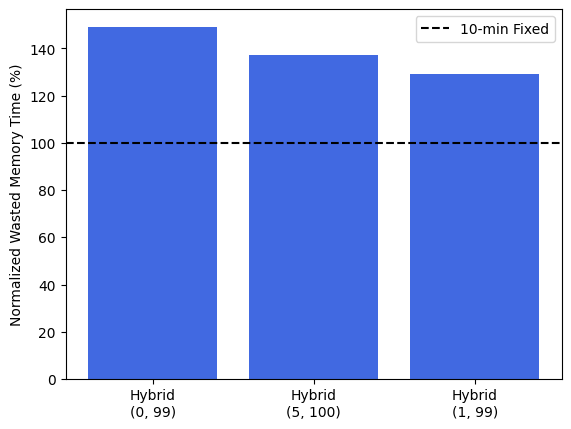

In [8]:
graphs = [{'Percentile': (0,99), 'Color': 'tab:orange', 'Linestyle': '-'},
          {'Percentile': (5,100), 'Color': 'tab:green', 'Linestyle': '-'},
          {'Percentile': (1,99), 'Color': 'tab:red', 'Linestyle': '-'},]

for idx, graph in enumerate(graphs):
    percentile = graphs[idx]['Percentile']
    file_name = f'Hybrid_{percentile}.csv'
    file_path = os.path.join(results_path, file_name)
    sim_result = pd.read_csv(file_path)
    sim_result = sim_result[['ColdStartPercentage', 'WastedMemoryRatio']]

    graphs[idx]['DF'] = sim_result
    graphs[idx]['Label'] = f"Hybrid {percentile}"

fixed_10 = pd.read_csv(f"{results_path}/Fixed_10.csv")
# graphs.append({'DF': fixed_10, 'Label': '10-min Fixed', 'Linestyle': '-', 'Color': 'tab:gray'})

# Your data
labels = [(0,99), (5,100), (1,99)]

# Calculate the mean 'WastedMemoryRatio' for fixed_10
fixed_value = fixed_10['WastedMemoryRatio'].mean()

# Ensure fixed_value is not zero to avoid division by zero
if fixed_value == 0:
    raise ValueError("fixed_value is zero, cannot normalize data.")

# Extract and normalize data points
data_points = [
    (result_df['DF']['WastedMemoryRatio'].mean() / fixed_value) * 100
    for result_df in graphs
]

# Since fixed_value represents 100% after normalization
fixed_value_normalized = 100

# Set up the plot
fig, ax = plt.subplots()

# Plot each bar
bars = ax.bar(range(len(labels)), data_points, color='royalblue')

# Highlight the specific bar (fourth bar in this case)
# highlight_index = 3
# bars[highlight_index].set_color('orange')
# bars[highlight_index].set_hatch('//')

# Add the horizontal line for 10-min Fixed at 100%
ax.axhline(y=fixed_value_normalized, color='black', linestyle='--', label="10-min Fixed")

# Labels and formatting
ax.set_xticks(range(len(labels)))
ax.set_xticklabels([f"Hybrid\n{label}" for label in labels])
ax.set_ylabel("Normalized Wasted Memory Time (%)")
ax.legend()

plt.savefig(f"{plot_path}/barplot_big.pdf")

plt.show()

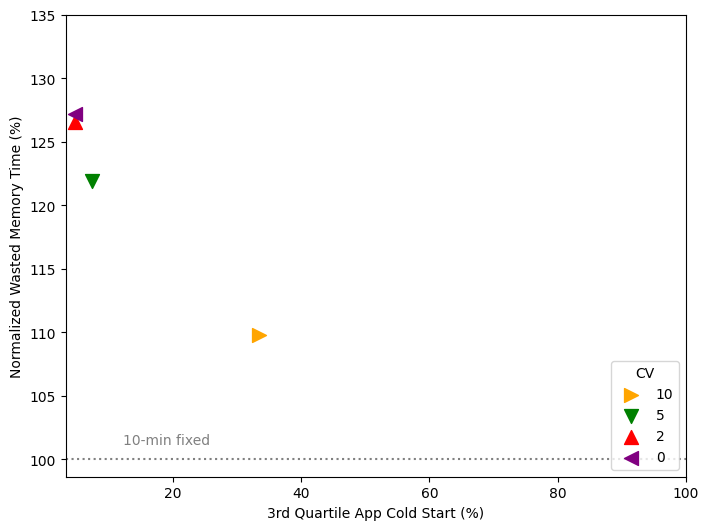

In [13]:
## CV PARETO

result_list = []
markers = ['>', 'v', '^', '<']  # Different markers for each CV level
colors = ['orange', 'green', 'red', 'purple']  # Custom colors for each CV level

for idx, cv in enumerate([10, 5, 2, 0]):
    filename = f'Hybrid_CV_{cv}.csv'
    file_path = os.path.join(results_path, filename)
    sim_result = pd.read_csv(file_path)
    sim_result = sim_result[['ColdStartPercentage', 'WastedMemoryRatio']]
    
    plot_dict = {
        'DF': sim_result,
        'Label': f"{cv}",
    }
    result_list.append(plot_dict)

fixed_10 = pd.read_csv(f"{results_path}/Fixed_10.csv")

plotting.plot_pareto_front_cv(result_list, fixed_10['WastedMemoryRatio'].mean(), markers, colors, save_file=True, file_name=f'{plot_path}/cv_pareto.pdf')

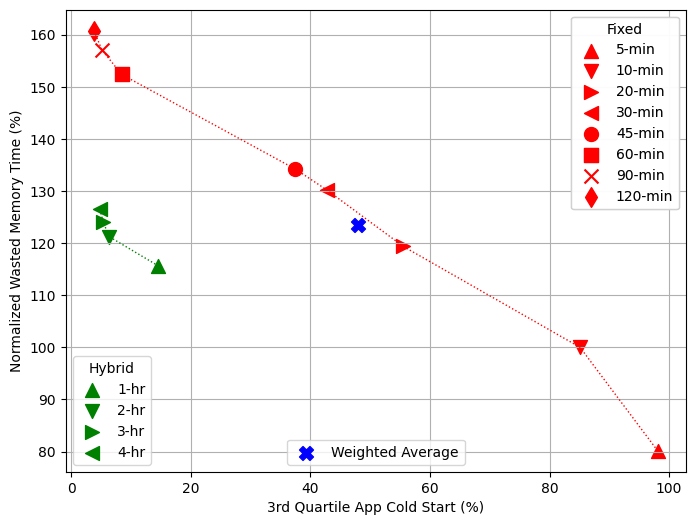

In [10]:
## PARETO FIXED-HYBRID-WEIGHTED
list_hybrid = []
for window in [1,2,3,4]:
    filename = f'Hybrid_Window_{window}.csv'
    file_path = os.path.join(results_path, filename)
    sim_result = pd.read_csv(file_path)
    sim_result = sim_result[['ColdStartPercentage', 'WastedMemoryRatio']]

    plot_dict = {}
    plot_dict['DF'] = sim_result
    plot_dict['Label'] = f"{window}-hr"
    plot_dict['Linestyle'] = '-'

    list_hybrid.append(plot_dict)


list_fixed = []
for keep_alive in [5,10,20,30,45,60,90,120]:
    filename = f'Fixed_{keep_alive}.csv'
    file_path = os.path.join(results_path, filename)
    sim_result = pd.read_csv(file_path)
    sim_result = sim_result[['ColdStartPercentage', 'WastedMemoryRatio']]

    plot_dict = {}
    plot_dict['DF'] = sim_result
    plot_dict['Label'] = f"{keep_alive}-min"
    plot_dict['Linestyle'] = '-'

    list_fixed.append(plot_dict)


w_avg_results = pd.read_csv(f'{results_path}/weighted_average.csv')
w_avg_results = w_avg_results[['ColdStartPercentage', 'WastedMemoryRatio']]

w_avg_list = []

w_avg_list.append({'DF': w_avg_results, 'Label': 'Weighted Average', 'Linestyle': '-'})


plotting.plot_pareto_front(list_fixed,
                           list_fixed[1]['DF']['WastedMemoryRatio'].mean(),
                           markers=['^', 'v', '>', '<', 'o', 's', 'x', 'd'],
                           hour_data=list_hybrid,
                           weighted_avg_data=w_avg_list,
                           save_file=True,
                           file_name=f'{plot_path}/hybrid_fixed_weighted_pareto.pdf')

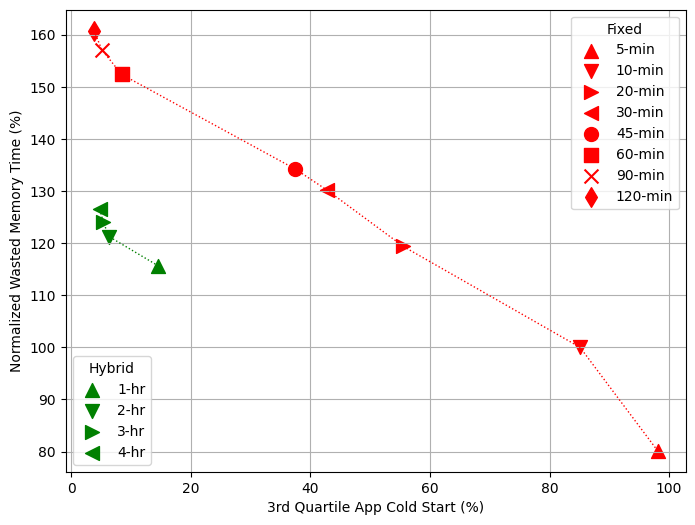

In [11]:
## PARETO FIXED-HYBRID
list_hybrid = []
for window in [1,2,3,4]:
    filename = f'Hybrid_Window_{window}.csv'
    file_path = os.path.join(results_path, filename)
    sim_result = pd.read_csv(file_path)
    sim_result = sim_result[['ColdStartPercentage', 'WastedMemoryRatio']]

    plot_dict = {}
    plot_dict['DF'] = sim_result
    plot_dict['Label'] = f"{window}-hr"
    plot_dict['Linestyle'] = '-'

    list_hybrid.append(plot_dict)


list_fixed = []
for keep_alive in [5,10,20,30,45,60,90,120]:
    filename = f'Fixed_{keep_alive}.csv'
    file_path = os.path.join(results_path, filename)
    sim_result = pd.read_csv(file_path)
    sim_result = sim_result[['ColdStartPercentage', 'WastedMemoryRatio']]

    plot_dict = {}
    plot_dict['DF'] = sim_result
    plot_dict['Label'] = f"{keep_alive}-min"
    plot_dict['Linestyle'] = '-'

    list_fixed.append(plot_dict)


w_avg_results = pd.read_csv(f'{results_path}/weighted_average.csv')
w_avg_results = w_avg_results[['ColdStartPercentage', 'WastedMemoryRatio']]

w_avg_list = []

w_avg_list.append({'DF': w_avg_results, 'Label': 'Weighted Average', 'Linestyle': '-'})


plotting.plot_pareto_front(list_fixed,
                           list_fixed[1]['DF']['WastedMemoryRatio'].mean(),
                           markers=['^', 'v', '>', '<', 'o', 's', 'x', 'd'],
                           hour_data=list_hybrid,
                           save_file=True,
                           file_name=f'{plot_path}/hybrid_fixed_pareto.pdf')

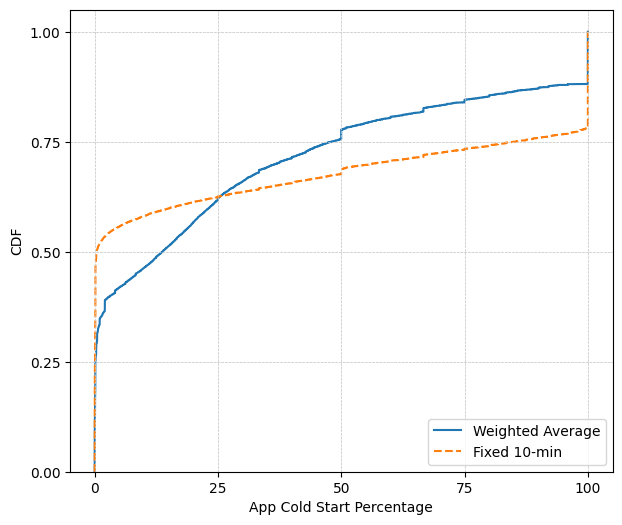

In [12]:
w_avg_results = pd.read_csv(f'{results_path}/weighted_average.csv')
w_avg_results = w_avg_results[['ColdStartPercentage', 'WastedMemoryRatio']]


fixed_10 = pd.read_csv(f"{results_path}/Fixed_{10}.csv")
fixed_10 = fixed_10[['ColdStartPercentage', 'WastedMemoryRatio']]

w_avg_list = []

w_avg_list.append({'DF': w_avg_results, 'Label': 'Weighted Average', 'Linestyle': '-', 'Color': 'tab:blue'})
w_avg_list.append({'DF': fixed_10, 'Label': 'Fixed 10-min', 'Linestyle': '--', 'Color': 'tab:orange'})

plotting.plot_cdf_coldstarts(w_avg_list)
# , save_file=True, file_name=f'{plot_path}/fixed_weighted_cdf.pdf'